# Peyton Fosnough

# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset=pd.read_csv('HRV.csv')
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
chol=dataset['totChol'].median()
dataset['totChol'].fillna(chol, inplace=True)

In [7]:
HR=dataset['heartRate'].median()
dataset['heartRate'].fillna(HR, inplace=True)

In [8]:
bmi=dataset['BMI'].median()
dataset['BMI'].fillna(bmi, inplace=True)

In [9]:
glucose=dataset['glucose'].median()
dataset['glucose'].fillna(glucose, inplace=True)

In [10]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

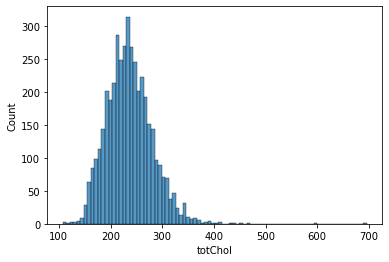

In [11]:
sns.histplot(dataset['totChol'])

<AxesSubplot:xlabel='glucose', ylabel='Count'>

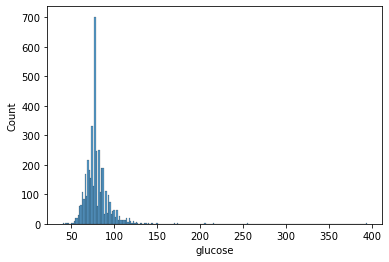

In [12]:
sns.histplot(dataset['glucose'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

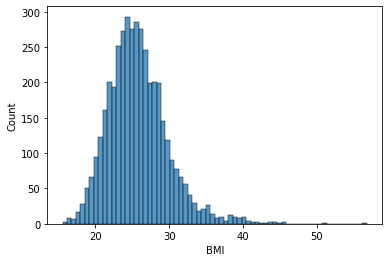

In [13]:
sns.histplot(dataset['BMI'])

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

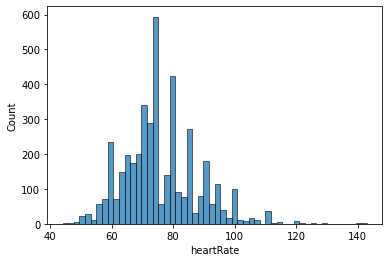

In [14]:
sns.histplot(dataset['heartRate'])

### Create independent and dependent variables to predict 

In [15]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
X=dataset.drop('TenYearCHD',axis=1)
Y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=.2,
                                               random_state=50)

## Training the Logistic Regression model 

In [18]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
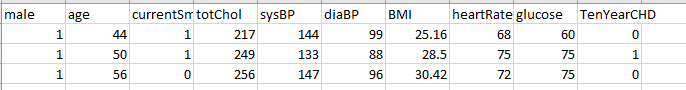

In [19]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))
#Predicition was correct

[0]


In [20]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))
#Predicted incorrectly

[0]


In [21]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))
#Prediction was correct

[0]


### Confusion matrix, Confusion matrix display and classification report

In [22]:
y_pred=classifier.predict(X_test.values)

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[705  10]
 [123   9]]


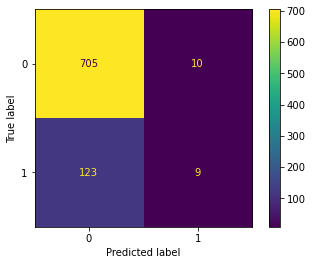

In [24]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

###### The model had 705 true negatives which means that the model predicted a negative, and the results were also negative. There were 10 false positives, which means the model predicted a positive but the result was actually negative. There were also 123 false negatives, so the model predicted negative but the actual results were positive, and then there were 9 true positives, meaning both the model predicted and the actual results were positive.

### Summary

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       715
           1       0.47      0.07      0.12       132

    accuracy                           0.84       847
   macro avg       0.66      0.53      0.52       847
weighted avg       0.79      0.84      0.79       847



##### The data was analyzed to identify risk factors associated with an individual's diagnosis of coronary heart disease, including sex, age, smoking status, cholesterol levels, systolic and diastolic blood pressure, heart rate, bmi, and glucose levels. I built a logistic regression model using python to predict the presence of heart disease with these factors with a test size of 20%. The model was 84% accurate, producing a significant amount of true negative outcomes, but also produced an excess amount of false negative outcomes which is not favorable.